<a href="https://colab.research.google.com/github/jcmachicao/ModCpx/blob/main/ModCplx__montecarlo_rutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación Monte Carlo para definición de probabilidad de retorno en rutas aleatorias

Desarrollado por GestioDinámica. <br>
Autor: José Machicao <br>
Este ejemplo está adaptado utilizando la fuente. Video Original: "A Random Walk & Monte Carlo Simulation || Python Tutorial || Learn Python Programming" Socratica. Fuente: https://www.youtube.com/watch?v=BfS2H1y6tzQ

### Importación de Librerías
Se requiere importar la librería para gráficos y la de generación de números aleatorios.

In [ ]:
#@title Importación
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

### Generación de Herramientas


Las "rutas_aleatorias" están definidas en un plano, por lo tantos se usa 4 sentidos (NSEO). Esto describe además el grado de complejidad del sistema. <br>
Por ejemplo, si se hubiera elegido una configuración en 3 dimensiones (para un dron por ejemplo), el número de direcciones podría ser de hasta 6, incluyendo hacia arriba y hacia abajo.
Por ejemplo, si se asigna n1 para expresar que el número de pasos que se hace en un experimento, la ruta que se dibuja es como se muestra.


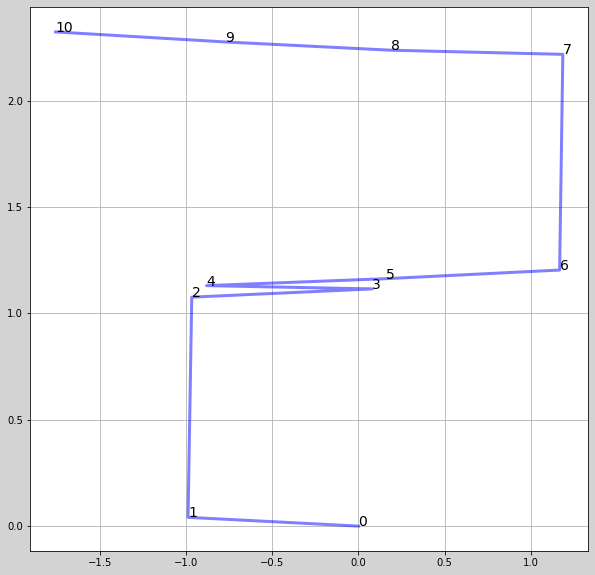

In [ ]:
#@title Generación aleatoria de Rutas
n1 = 10

#se pone todas las variables a cero
lineax = [0]
lineay = [0]
x, y, dx, dy = 0, 0, 0, 0

#se hace una rutina para generar una caminata aleatoria
for i in range(n1):
    (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
    x += dx + np.random.rand()/20
    y += dy + np.random.rand()/20
    lineax.append(x)
    lineay.append(y)

#se dibuja la caminata aleatoria
plt.figure(figsize=(10,10), facecolor='lightgray')
plt.plot(lineax, lineay, 'b', alpha=0.5, lw=3)
for i in range(len(lineax)):
    plt.text(lineax[i], lineay[i], i, fontsize=14)
plt.grid(True)
plt.show()

### Definición de Rutas Aleatorias (Creación de Función)

In [ ]:
#@title Definición de funciones
def rutas_aleatorias(n):
#Genera coordenadas luego de n pasos 
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy 
    return (x, y)

### Definición de Parámetros de Experimento

Se establece:
* El **número de caminatas** con las cuales se probará el modelo. Esto representa la cantidad de experimentos. Mientras más experimentos ocurran más precisión se podrá lograr en la descripción del modelo.
* La **distancia máxima de retorno**, que significa a qué número de pasos el caminante ya se considera muy lejos de su punto inicial. En los ejemplos más típicos mostrados en publicaciones generalmente se usa el ejemplo de "volver en transporte en lugar de volver a pie". En este  caso particular se repite dos veces cada distancia límite para graficar con evidencia la diferencia de generación de valores aleatorios.
* El **número de pasos** representa el máximo número de pasos de cada experimento. El algoritmo usará primero experimentos con 1 paso, luego con 2 pasos. El límite para estos experimentos se establece con este número.


In [ ]:
numero_caminatas = 800    # es el número de experimentos.
dist_max = [2, 5, 15] # distancia máxima de preferencia de retorno a pie
numero_pasos = 120
lm = len(dist_max) #esto permite variar el número de experimentos de dist_max_a_pie

Se aplica las caminatas con un rango de pasos del 1 al Núemro de Pasos para estas caminatas. <br>
Por ejemplo si la Distancia de Retorno es 4 (el caminante retorna a pie si su distancia final es menor que 4), si en el primer experimento con un largo de 1 paso, que puede ir en cualquiera de los 4 sentidos (N, S, E, O), para caminatas de 2 pasos, la probabilidad de regresar a pie es siempre 100% porque en todos los casos el punto final estará a menos de 4 pasos de distancia. <br>
Pero cuando la cantidad de pasos es mayor, la probabilidad de quedar más lejos de 4 se reparte con la probabilidad de quedar más cerca.

In [ ]:
#@title Generación de data de experimentos
historico = [[], [], []] #alterar los vacíos en función de la longitud de alternativas dist_max_a_pie
for j in range(lm):    
    historico[j] = [[]]
    for largo_caminata in range(1, numero_pasos+1): 
        pos_fin = 0  #que requiera menos de 4 pasos para regresar al punto inicial 
        for i in range(numero_caminatas):
            (x, y) = rutas_aleatorias(largo_caminata)
            distancia = abs(x) + abs(y)
            if distancia <= dist_max[j]:
                pos_fin += 1 
        porcent_pos_fin = (float(pos_fin) / numero_caminatas) * 100
        historico[j].append([largo_caminata, porcent_pos_fin])        

La generación de experimentos permite un gráfico aproximado de las curvas de pronóstico de cómo será el comportamiento total de muchos pasajeros en muchas decisiones que toman (en este caso cómo es el comportamiento total de muchos pasajeros para varios niveles de decisión de a partir de qué distancia empezarán a tomar bus para volver a su punto de partida).

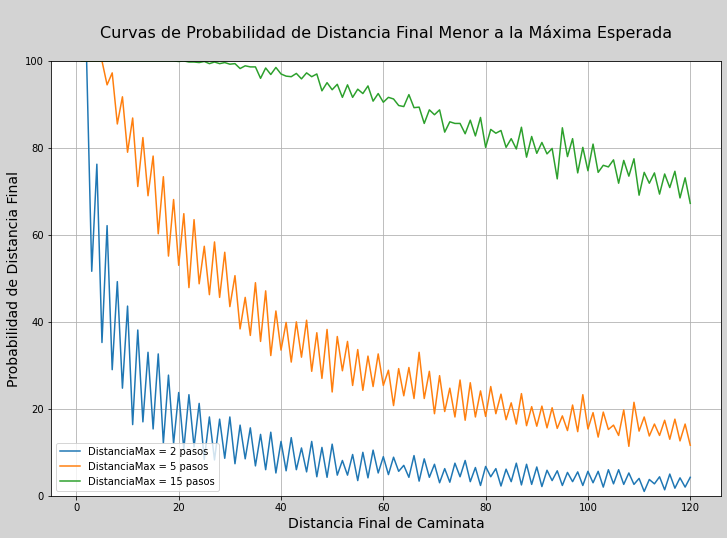

In [ ]:
#@title ¿Qué probabilidad hay de tener pasajeros para un bus?
plt.figure(figsize=(12,8), facecolor='lightgray')
for i in range(lm):
    historico[i] = pd.DataFrame(historico[i])
    historico[i].columns = ['pasos','% regpie']
    plt.plot(historico[i]['pasos'],historico[i]['% regpie'], label='DistanciaMax = '+str(dist_max[i])+' pasos')
plt.legend(loc='lower left')
plt.xlabel('Distancia Final de Caminata', fontsize=14)
plt.ylabel('Probabilidad de Distancia Final', fontsize=14)
plt.title(' \nCurvas de Probabilidad de Distancia Final Menor a la Máxima Esperada\n ', fontsize=16)
plt.grid(True)
plt.ylim(0,100)
plt.show()

La variable vertical indica el % de probabilidad de que la posición final sea menor a la posición final máxima.

## Conclusión

A medida que el límite de número de pasos de retorno se hace más grande, hay menos incertidumbre en la probabilidad de retorno en bus. En cambio si el número límite es muy pequeño, las probabilidades se hacen más confusas y podría ser más dificil determinar qué formula está escondida detrás del sistema. Sin embargo las tendencias se pueden identificar todavía. El nivel de aleatoriedad no está tan disperso en el conjunto y sigue un patrón que permite delinear promedios incluso con los números aleatorios. 
Esto podría variar si, por ejemplo, se complica el sistema con factor adicional de complejidad. Por ejemplo, si el caminante se distrae. 